# Total Price VS Solar Power

# Loading

In [3]:
import pandas as pd

energy_prices_df = pd.read_csv('../data/processed/canton_energy_prices_2021_2024.csv')
solar_adoption_df = pd.read_csv('../data/processed/canton_solar_adoption_2021_2024.csv')

# Merge datasets
combined_df = pd.merge(
    energy_prices_df, 
    solar_adoption_df, 
    on=['Canton', 'Year']
)

combined_df

,Canton,Year,price_before_surcharge,renewable_surcharge,total_price,canton,year,adoption_rate
0,Aargau,2021,0.149765,0.023,0.172765,AG,2021,0.276907
1,Aargau,2022,0.155994,0.023,0.178994,AG,2022,0.265202
2,Aargau,2023,0.212516,0.023,0.235516,AG,2023,0.351396
3,Aargau,2024,0.297034,0.023,0.320034,AG,2024,0.270778
4,Appenzell Ausserrhoden,2021,0.151767,0.023,0.174767,AR,2021,0.216626
...,...,...,...,...,...,...,...,...
99,Zug,2024,0.286872,0.023,0.309872,ZG,2024,0.240148
100,Zurich,2021,0.147014,0.023,0.170014,ZH,2021,0.440261
101,Zurich,2022,0.151312,0.023,0.174312,ZH,2022,0.217950
102,Zurich,2023,0.189901,0.023,0.212901,ZH,2023,0.298220


# Input Visualisation

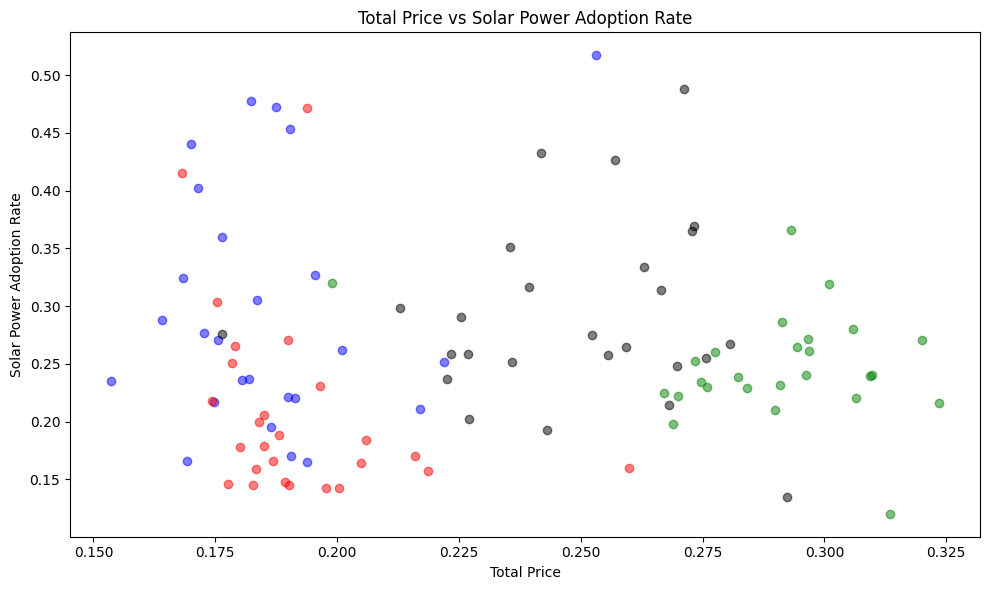

In [4]:
import matplotlib.pyplot as plt


# Create the plot
plt.figure(figsize=(10, 6))

years = [2021, 2022, 2023, 2024]
colors = {
    2021: 'blue',
    2022: 'red',
    2023: 'black',
    2024: 'green'
}

for year in years:
    data = combined_df[combined_df['Year'] == year]
    plt.scatter(data[['total_price']], data[['adoption_rate']], color=colors[year], alpha=0.5)

plt.xlabel('Total Price')
plt.ylabel('Solar Power Adoption Rate')
plt.title('Total Price vs Solar Power Adoption Rate')

plt.tight_layout()
plt.show()

# Scaling

In [5]:
from sklearn.preprocessing import StandardScaler

X = combined_df[['total_price']]
y = combined_df[['adoption_rate']]

scaler = StandardScaler()
X = scaler.fit_transform(X)


# Training

In [6]:
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.linear_model import LinearRegression

model = LinearRegression()

years = [2021, 2022, 2023, 2024]

predictions = []

for predicted_year in years:
    X_train = X[combined_df['Year'] != predicted_year]
    X_test = X[combined_df['Year'] == predicted_year]
    
    y_train = y[combined_df['Year'] != predicted_year]
    y_test = y[combined_df['Year'] == predicted_year]
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    predictions.append([X_test, y_pred])
    
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)

    print(f"Predicting year: {predicted_year}")
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared: {r2}")

Predicting year: 2021
Mean Squared Error: 0.01439290108516536
R-squared: -0.35699464610075293
Predicting year: 2022
Mean Squared Error: 0.013615483140392721
R-squared: -1.07094342718241
Predicting year: 2023
Mean Squared Error: 0.007936722818971256
R-squared: -0.323188256611304
Predicting year: 2024
Mean Squared Error: 0.004441133542731105
R-squared: -1.1814546721455859


# Results

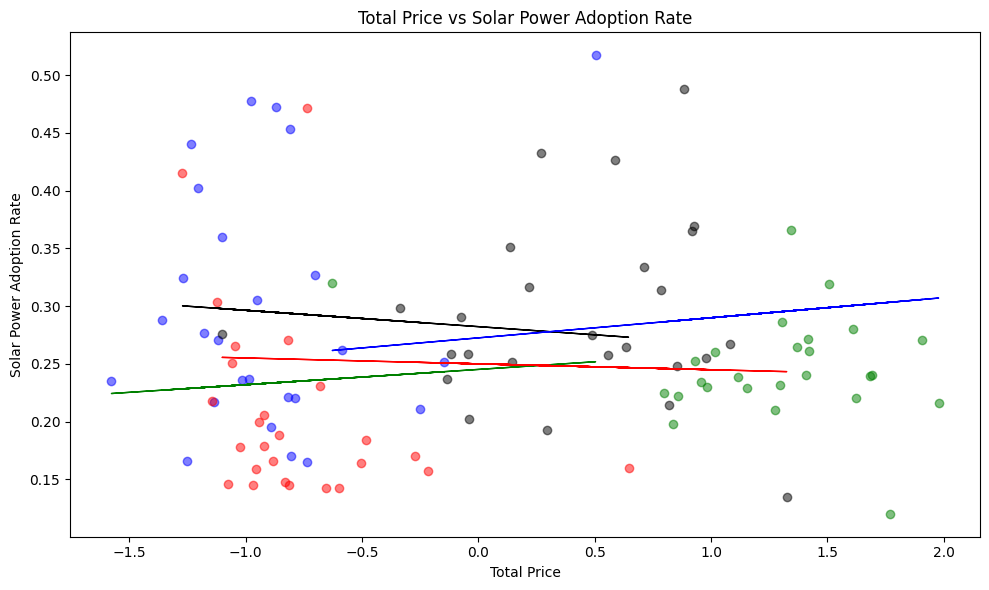

In [12]:
import matplotlib.pyplot as plt


# Create the plot
plt.figure(figsize=(10, 6))
colors = {
    2021: 'blue',
    2022: 'red',
    2023: 'black',
    2024: 'green'
}

for year in years:
    data = combined_df[combined_df['Year'] == year]
    x = X[combined_df['Year'] == year]
    plt.scatter(x, data[['adoption_rate']], color=colors[year], alpha=0.5)

colors = [
  'blue',
  'red',
  'black',
  'green'
]

for prediction in predictions:
    plt.plot(prediction[0], prediction[1], color=colors.pop(), linewidth=1)


plt.xlabel('Total Price')
plt.ylabel('Solar Power Adoption Rate')
plt.title('Total Price vs Solar Power Adoption Rate')

plt.tight_layout()
plt.show()